<a href="https://colab.research.google.com/github/dudaribeiro7/fundamentos_mecanica_estruturas_UFJF/blob/main/%5BMAC019%5D_P2_2022_1_grupo_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P2: Segunda Avaliação de Conhecimentos   

# Identificação da Equipe

1. Enedilson Fernandes Junior
2. Gabriela Machado Gazola
3. Maria Eduarda Ribeiro Facio

# Condições Gerais


Essa tarefa tem como objetivo avaliar os conhecimentos adquiridos durante a disciplina de Fundamentos de Mecânica das Estruturas (cabos flexíveis).


As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com até e 4 integrantes. 

2. A avaliação será realizada por meio da entrega de um **relatório** e de **códigos desenvolvidos** até a data estipulada. 

3. Os documentos necessários para a entrega do trabalho são (1) um relatório com
a descricão da solução e (2) os códigos desenvolvidos pela equipe. A equipe deve usar este modelo de notebook para desenvolver os códigos e escrever o relatório.

4. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.

4. Um dos integrantes será indentificado como responsável pela entrega do documentos necessários na sala virtual da disciplina.

6. As equipes devem ser formadas até às **18 horas o dia 30/06/2021** por meio do preenchimento da planilha [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit#gid=153704268).

7. A formação das equipes pode ser acompanhada arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit#gid=153704268). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 2 (A2, B2, C2, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

8. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

9. A equipe deve indicar no arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit#gid=153704268) um responsável pela entrega do projeto. 


10. A entrega dos projetos (videos explicativos e códigos) deve ocorrer até às **23:59 do dia 21/07/2021** na plataforma da disciplina pelo responsável pela entrega. **Os arquivos devem ser compartilhados com leonardo.goliatt@ufjf.br** 

11. Quaisquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.
---

# Importação de pacotes

In [ ]:
import math
import sympy as sp
import numpy as np
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Questão 1 (25 pontos)

Um cabo tem tração máxima admissível de 110 kN e as extremidades do cabo estão ancorados na mesma elevação.  O cabo deve suportar uma carga uniforme e horizontal sobre um vão de 85m com flecha admissível de 16m.

1. Qual o valor da carga distribuída máxima que o cabo pode suportar?
2. Qual o comprimento necessário do cabo nessa condição?
3. Desenhe um esboço do cabo 
4. Devido a um erro de execução descobriu-se que o apoio do cabo no problema tinha sido colocado 5 metros acima da outra mas a flecha admissível a partir do ponto inferior tinha sido mantida 16 m.  Resolva o problema para as condições dessa construção. Discuta a solução proposta.


In [ ]:
# Parâmetros do problema:
T = 110 #kN (tração maxima)
L = 85 #m (vão)
h = 16 #m (flecha)

Para encontrar o valor da carga distribuida máxima que o cabo pode suportar, utilizaremos as seguintes expressões:

$T^2 = T_0^2 + (w * l_a)^2$  
e  
$T_0 = \frac{w}{2h} * l_a^2$

sendo $T_0$ o valor da tração no ponto mínimo. Trabalhando essas expressões, chega-se em:

$2hw^2 + w - \frac{2hT^2}{l_a^2} = 0$

que iremos resolver com a fórmula de bhaskara.

In [ ]:
def bhaskara(a, b, c):
  delta = math.pow(b, 2) - 4*a*c
  if(delta > 0):
    x1 = (-b + math.sqrt(delta)) / 2*a
    x2 = (-b - math.sqrt(delta)) / 2*a
    return x1, x2
  return 0,0

In [ ]:
La = L/2
a = 2*h
b = 1
c = - (2*h*math.pow(T, 2)) / pow(La, 2)

w1, w2 = bhaskara(a, b, c)

print("O valor da carga distribuída máxima que o cabo pode suportar é", max(w1, w2), "kN.")

O valor da carga distribuída máxima que o cabo pode suportar é 2634.4012361909977 kN.


Para encontrar o comprimento necessário do cabo nessa condição, utilizaremos a seguinte equação:

$S_a = l_a[1 + \frac{2}{3}(\frac{h}{l_a})^2 - \frac{2}{5}(\frac{h}{l_a})^4]$

sendo $S_a$ o valor do comprimento do cabo até o ponto mínimo, e, como as extremidades do cabo estão ancorados na mesma elevação, $S_a$ é metade do valor de $S$.

In [ ]:
Sa = La * (1 + 2/3 * pow(h/La, 2) - 2/5 * pow(h/La, 4))
S = 2 * Sa
print("O comprimento necessário do cabo é", S, "m.")

O comprimento necessário do cabo é 92.34840018997217 m.


Esboço do cabo:

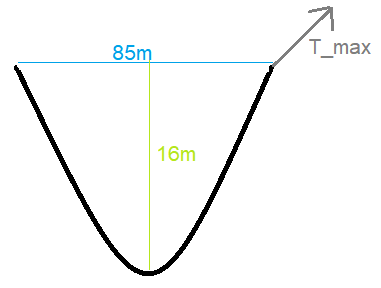

In [ ]:
hb = 16 + 5

Lb = L/2
a = 2*hb
b = 1
c = - (2*hb*math.pow(T, 2)) / pow(Lb, 2)

w3, w4 = bhaskara(a, b, c)

print("O valor da carga distribuída máxima que o cabo pode suportar na nova situação é", max(w1, w2, w3, w4), "kN.")

O valor da carga distribuída máxima que o cabo pode suportar na nova situação é 4544.695354022643 kN.


In [ ]:
Sb = Lb * (1 + 2/3 * pow(hb/Lb, 2) - 2/5 * pow(hb/Lb, 4))
S = Sa + Sb
print("O comprimento necessário do cabo na nova situação é", S, "m.")

O comprimento necessário do cabo na nova situação é 94.5784717009295 m.


Novo esboço do cabo:

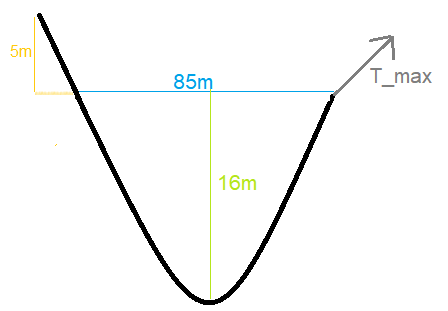

# Questão 2 (25 pontos)

Uma série de flutuadores esféricos são igualmente espaçados e presos com segurança a um cabo flexível de 20 m de comprimento. As extremidades $A$ e $B$ estão ancoradas a 16 m de distância no fundo de um lago de água doce a uma profundidade de 8 m. Os flutuadores e o cabo têm um peso combinado de 100 N por metro de comprimento de cabo, e a flutuabilidade da água produz uma força ascendente de empuxo de 560 N por metro de comprimento de cabo. Calcule a profundidade $h$ abaixo da superfície até o topo da linha de flutuadores. Além disso, encontre o ângulo formado pela linha de flutuadores com a horizontal em $A$.

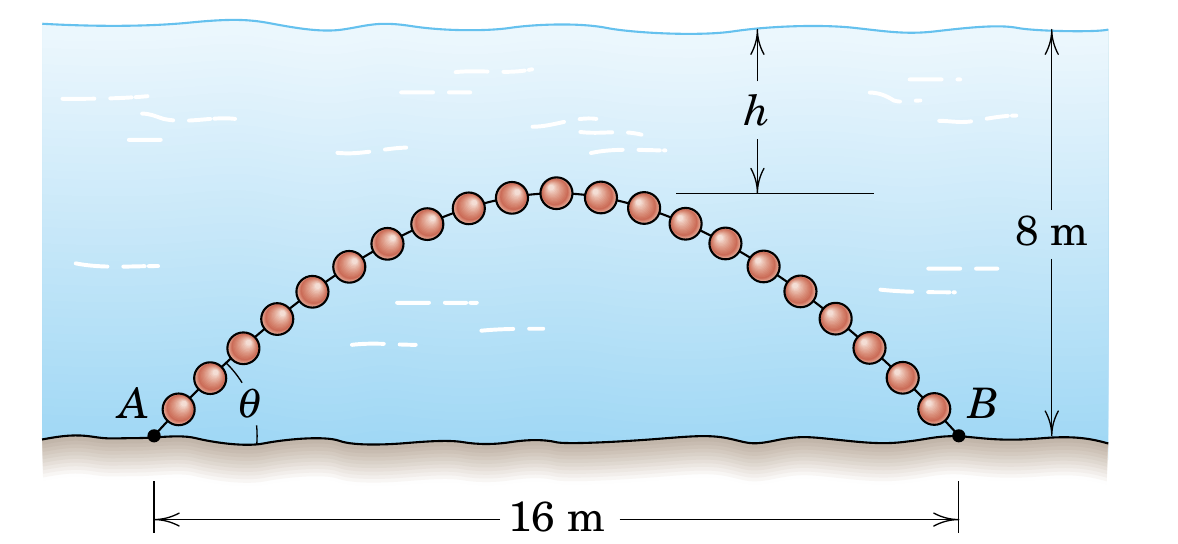

In [ ]:
#Acredito que para resolução, seja melhor por catenária, por depender de seu peso...
#Altura do peso central é (8-h)

# Parâmetros do problema:
comprimento = 20 #m
vao = 16 #m
profundidade = 8 #m
peso  = 100 #N/m #mu
empuxo = 560 #N/m






Para a resolução do problema, será usada a equação da catenária, pelo fato do cabo sofrer ação do seu próprio peso.

In [ ]:
# variáveis do problema
x,y,T_0, mu, x_0, y_0, x_1, y_1, prof, h, x_max, y_max, s = sp.var('x,y,T_0, mu, x_0, y_0, x_1, y_1, prof, h, x_max, y_max, s')

# monta a equação catenária 
eq = (T_0/mu * (sp.cosh(mu*x/T_0) - 1))
#comprimento do cabo
s_eq  = (T_0/mu * (sp.sinh(mu*x/T_0)))

display(eq)
display(" ")
display(s)


def t0(T0, mu_, x, s):
  t0 = []
  t0.append(((s*mu_)/(sp.sinh(mu_*x/T0[0]))))
 
  for i in range(1, len(T0)): 
    
    t0.append(((s*mu_)/(sp.sinh(mu_*x/T0[i]))))
  
  return t0  

#usando o ponto central como origem
mu_ = empuxo-peso               # peso por metro
x_0, x_1, x_max = 0 ,  16, 8     # simetria 
y_0, y_1, y_max = 0,    0, 8-y    # mesma altura(A e B)
s = comprimento/2


T_0*(cosh(mu*x/T_0) - 1)/mu

' '

s

Tomando a equação da catenária: 

$y(x) = \frac{T_{0} \left(\cosh{\left(\frac{\mu x}{T_{0}} \right)} - 1\right)}{\mu}$

Na extremidade direita temos:

$8-y = \frac{T_{0} \left(\cosh{\left(\frac{(460)(8)}{T_{0}} \right)} - 1\right)}{460}$



Porém, temos o comprimento do cabo e através dele, podemos encontrar o $T_0$:

$s = \frac{T_{0} \left(\sinh{\left(\frac{\mu x}{T_{0}} \right)} \right)}{\mu}$


In [ ]:
# substituição dos valores considerando o ponto da direita


yh = sp.Eq(y_max ,eq.subs({'mu':mu_, 'x':x_max}))
sh = sp.Eq(s ,s_eq.subs({'mu':mu_, 'x':x_max}))



display(yh)
display(sh)

Eq(8 - y, T_0*(cosh(3680/T_0) - 1)/460)

Eq(10.0, T_0*sinh(3680/T_0)/460)

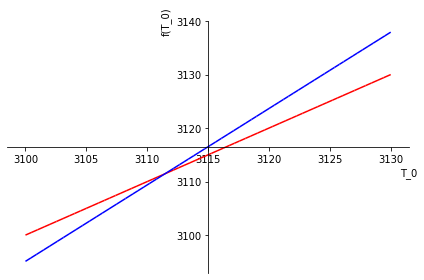

T_0*sinh(3680/T_0)/460 - 10.0

'T0 = 3111.45728758521'

In [ ]:
from sympy.plotting import plot, plot_implicit

p1=plot(T_0,(T_0,3100,3130), line_color='red', show=False)
p2=plot(s*(mu_)/(sp.sinh(x_max*(mu_)/T_0)),(T_0,3100,3130), line_color='blue', show=False)

p1.append(p2[0])
p1.show()

#Trac0 = np.linspace(3100, 3120, 2000)
#t0 = Trac0
#y = t0(Trac0,mu_,x_max, s)
#y__1 = np.ones(2000)*10

#l1 = LineString(np.column_stack((Trac0,y)))
#l2 = LineString(np.column_stack((Trac0,y__1)))
#intersection = l1.intersection(l2)

c_1 = s_eq.subs({'mu':mu_, 'x':x_max}) - s
display(c_1)

T_0_ = sp.nsolve( c_1 , T_0, 3100 )
display("T0 = "+ str(T_0_))

#foi utlizado o método gráfico

Na extremidade direita temos:

$T_A = {T_{0} \left(\cosh{\left(\frac{(460)(8)}{T_{0}} \right)} \right)}$



In [ ]:
#Encontrar T_A
mu_ = 460
x = 8
T_0_ = T_0_
eq_A = (T_0_ * (sp.cosh(mu_*x/T_0_)))
ta = (T_0_ * (sp.cosh(mu_*x/T_0_)))
ta 


5553.48237167159

In [ ]:
#y máximo
mu_ = 460
x = 8
T_0_ = T_0_
y = (  ta-T_0_ )/mu_

#H
h = 8 - y
display("A altura é " + str(round(h,2)))

tg_theta = np.sinh(460*8/int(T_0_))
theta = math.atan(tg_theta)

display("O ângulo theta é " + str(round(math.degrees(theta),2)))

'A altura é 2.69'

'O ângulo theta é 55.93'

# Questão 3 (25 pontos)

Uma corda de 32 m de comprimento está suspensa entre dois pontos separados por uma distância horizontal de 10 m. Determine a distância $h$ até a parte mais baixa.

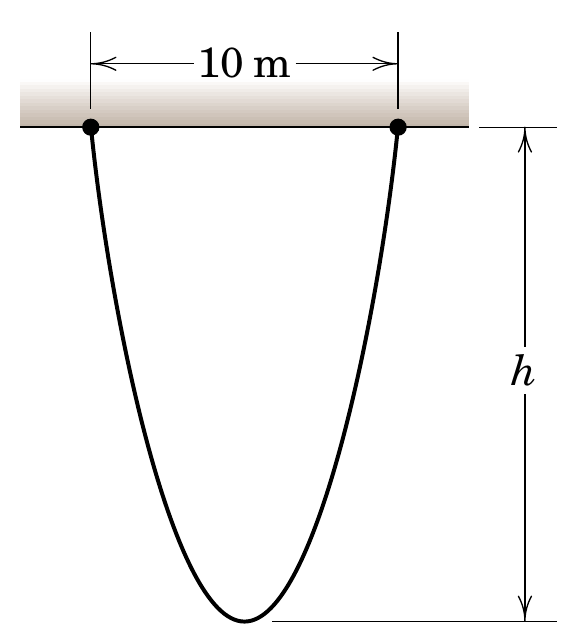

In [ ]:
# Parâmetros do problema:
S = 32 #m (comprimento)
L = 10 #m (vão)

Temos pela figura que o comprimento da corda é 32m e o vão 10m. Mas, trabalhando só com metade da corda para termos uma noção de curva, temos que:

$s = \frac{T_0}{\mu}\textrm{senh}(\frac{x\mu}{T_0})$

onde $s$ é o comprimento de metade da corda, $T_0$ é a tração no ponto mínimo, $\mu$ é o peso da corda e $x$ é a posição horizontal do ponto mínimo, ou seja, $x = 5$. Resolvendo graficamente, tem-se:

(1) ---> $\frac{T_0}{\mu} = 1225.6$

Sabe-se que:

(2) ---> $h = \frac{T_0}{\mu}[\textrm{cosh}(\frac{x\mu}{T_0}) - 1]$

Substituindo (1) em (2), tem-se:

$h = 1225.6[\textrm{cosh}(\frac{5}{1225.6}) - 1]$

In [ ]:
x = L/2
aux = 1225.6

h =  aux * (math.cosh(x/aux) - 1)
h

0.010199100307653452

# Questão 4 (25 pontos)

A Figura abaixo mostra a cobertura do Aeroporto Dulles, em Washington, a qual consiste de uma casca de concreto protendido, obtida por meio de um engenhoso sistema construtivo, ilustrado nas Figuras abaixo. A cobertura tem geometria cilíndrica, com uma geratriz catenária, razoavelmente aproximada por uma parábola, funicular, portanto, a um carregamento vertical uniformemente distribuído. O peso próprio da estrutura é da ordem de $w_{pp}$=6kN/m2. As cargas adicionais (neve e outros carregamentos) atingem $w_{ad}$=4kN/m2. Os cabos de protensão estão espaçados de 3m, e ancoram-se a vigas de borda que transferem as cargas para os topos de colunas inclinadas, engastadas nas bases, afastadas entre si de 12m. A cobertura tem um vão transversal de 50m, medindo 192m na direção transversal.

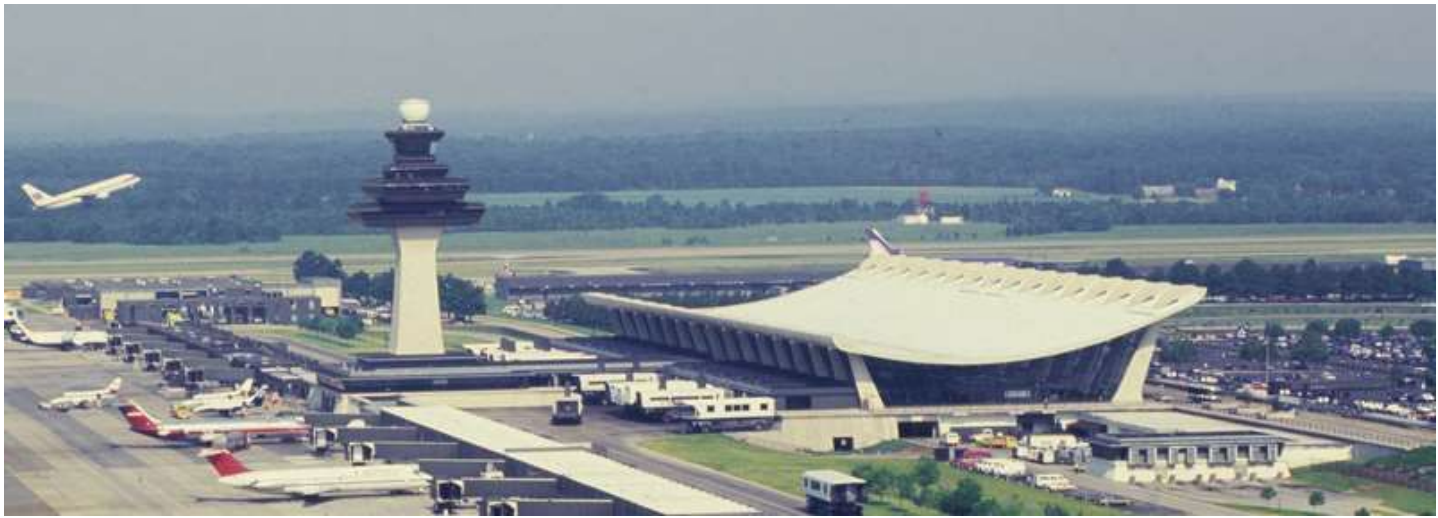

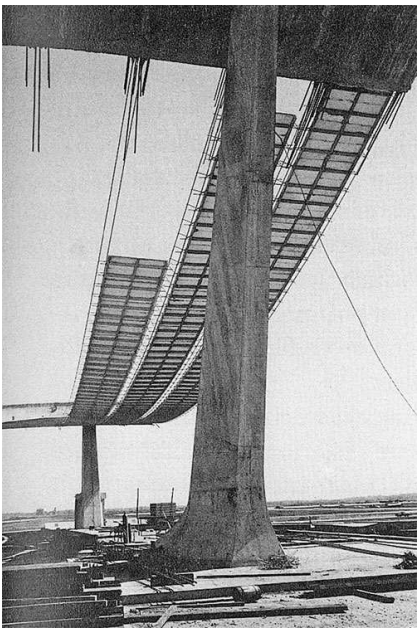

Considerando o esquema estrutural abaixo,


1. Ao modelar o problema, escolha entre a formulação em catenária ou parabólica e justifique a escolha.
2. Determine a altura $y_C$ que define a menor cota da cobertura (ponto C). Determine as reações de ancoragem dos cabos de protensão nas vigas de borda (pontos A e B). 
3. Determine as cargas resultantes nos topos da coluna DB, e o momento fletor na ancoragem da coluna maior (ponto D), quando atuar a carga $w_{pp}+w_{ad}$. Desconsidere o peso da coluna.




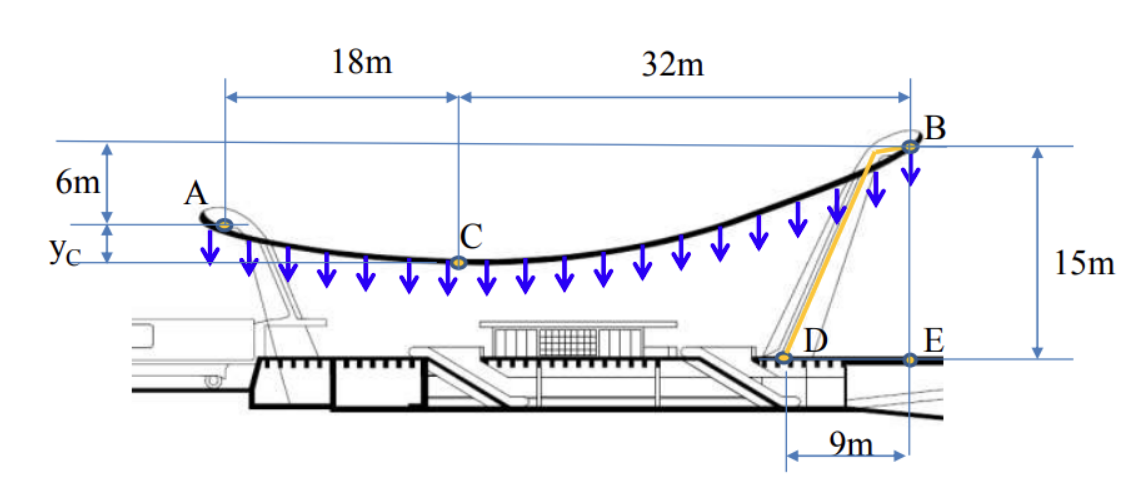

In [ ]:
import math
# Parâmetros do modelo:
wpp = 6 #kN/m2 (peso próprio da estrutura)
wad = 4 #kN/m2 (cargas adicionais)
La = 32
Lb = 18
total = 0 #carregamento vertical total
p = 0 #carga distribuida
Na = 0
Nb = 0
#Usando C como origem (0,0), temos que a posição do ponto A é (-18, yC), B(32, yC+6), E(32, 15-(yC+6)) e D(23, 15-(yC+6)); 23 por (32-9);




Para o desenvolvimento do problema utilizamos a formulação em catenária, pois a curva não está submetido a outras forças diferentes do seu próprio peso.

**Carregamento vertical total:**

$ T_{total} = W_{pp} + W_{ad}  $

 **Carga distribuida no cabo:**

$  p = total . 3  $

In [ ]:
total = wpp + wad

print("Valor carregamento vertical total: ", total, "KN/m^2")

Valor carregamento vertical total:  10 KN/m^2


In [ ]:
p = 3*total

print("Valor carga distribuida: ", p, "KN/m")

Valor carga distribuida:  30 KN/m


**Equilibrio horizontal:**

$∑{F_x}= 0, portanto$

$ -{H_a} + {H_b} = 0$

${H_a} = {H_b} = H $

**Equilibrio vertical:**

$∑{F_y}= 0, portanto $

$ {V_a} + {V_b} $



In [ ]:
print("Equilibrio vertical Va + Vb: ", p * (La+Lb))

Equilibrio vertical Va + Vb:  1500



**Equilibrio do trecho AC em torno do ponto A:**

$H . {y_c} = p.\frac{18²}{2} $

$H = 30 . \frac{324}{2} = \frac{4860}{y_c}$

**Equilibrio do trecho BC em torno do ponto B:**

$H. ({y_c+6}) = p. \frac{32²}{2}$

$H = 30 . \frac{1024}{2} = \frac{15360}{(y_c +6)}$

Igualando as duas equações:
$\frac{4860}{y_c} = \frac{15360}{(y_c +6)},temos $

$ {y_c} = 2,78 $

Logo,

$ H = \frac{4860}{2,78} = 1748,2 KN $

**Equilibrio de momento em torno do ponto A:**

$∑{M_a} = 0, portanto $

$30.\frac{50²}{2}+1748,2 . 6-{V_b}.50 = 0 $

${V_b} = 959,784 KN$

${V_a} = 1500 - 959,784 = 540,216 kN$

**Força resultante nos pontos de ancoragem:**

$ Em A: N_{max,a} = \sqrt{H² + {V_a}²}$

$ Em B: N_{max,b} = \sqrt{H² + {V_b}²}$

In [ ]:
Na = math.sqrt(pow(1748.2,2)+ pow(540.216,2))
Nb = math.sqrt(pow(1748.2,2)+pow(959.784,2))

print("Força resultante em A:", Na)
print("Força resultante em B:", Nb)

Força resultante em A: 1829.764074042334
Força resultante em B: 1994.3391303025671
